In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random
import scipy
from sklearn.metrics import pairwise_distances
from scipy.ndimage.filters import gaussian_filter1d

In [114]:
# plot/colors definitions
cpath = '/n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana'
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

plt.style.use('seaborn-paper')

In [115]:
def KLD_analysis(frequencies):
    '''rows are sessions (or mice/phases), columns are variables (syllables)'''
    cohort_dist=np.zeros((len(frequencies),len(frequencies)),dtype=float)
    x=0
    y=0
    for i in frequencies:
        for j in frequencies:
            i[i==0]=.0000000001
            j[j==0]=.0000000001
            cohort_dist[x,y]=scipy.stats.entropy(pk=np.array(i), qk=np.array(j))
            y=y+1
        y=0
        x=x+1
    cohort_dist[cohort_dist == 0] = 'nan'
    return cohort_dist

In [116]:
## upload data new male longtogeny
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/longv2_males_clean.parquet')
mdf = pd.read_parquet(path)

## filter out bad days - 
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/longv2_males_clean.parquet')
mdf = pd.read_parquet(path)
mdf=mdf.loc[[24,31,38,45,52,60]]
## filter out bad days - 
bad_syllable=[21,24,25,28,32,36,37,41,44,47,49,51]
#bad_syllable=[]
mdf.drop(bad_syllable, axis=1, inplace=True)
#fdf.drop(bad_syllable, axis=1, inplace=True)


newdf=mdf.copy()

# for males point by point kld and euc distance
n=0
ages=[]
kld=[]
euc=[]
mouse=[]
dif=[]
for age,_df in enumerate(newdf.groupby('mouse')):
    ages.extend(_df[1].index.get_level_values(0).to_numpy()[:-1])
    tmp = pd.Series(_df[1].index.get_level_values(0)).diff().to_numpy()
    dif.extend(tmp)
    mouse.extend(_df[1].index.get_level_values(1).to_numpy()[:-1])
    data_temp = _df[1].to_numpy()
    kld_temp = KLD_analysis(data_temp)
    utemp = pairwise_distances(data_temp)
    kld.append(np.diagonal(kld_temp,offset=1).copy()/ tmp[1:])
    euc.append(np.diagonal(utemp,offset=1).copy()/ tmp[1:])

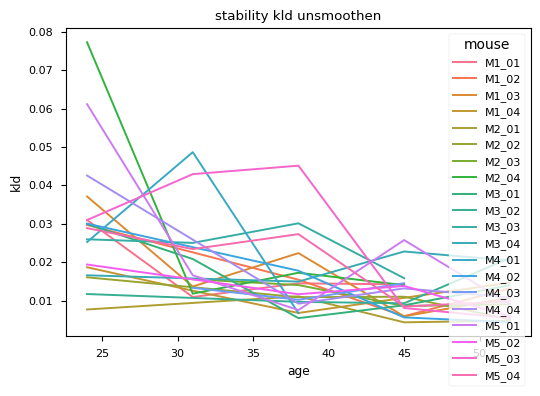

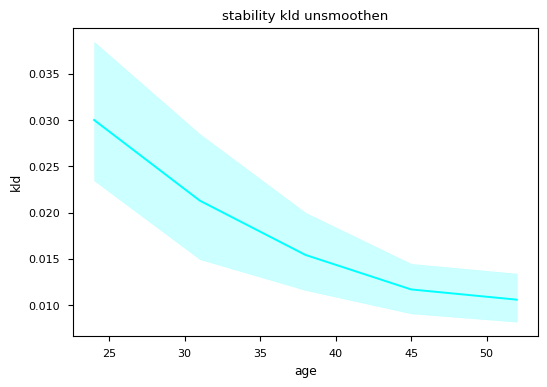

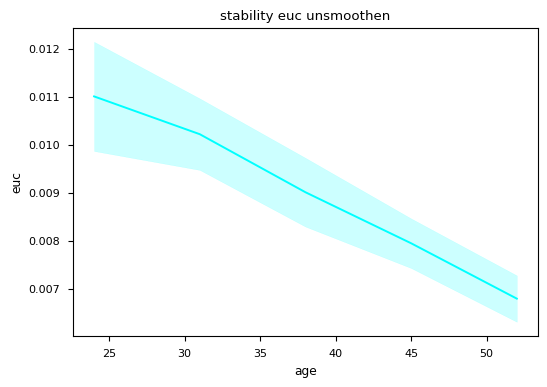

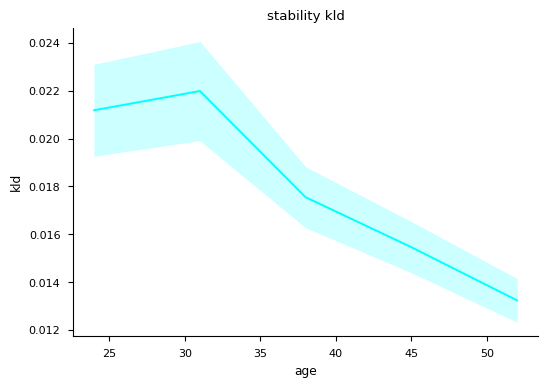

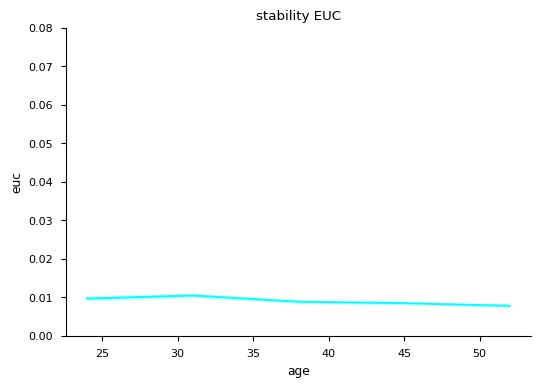

In [117]:
#prepate data for plot
flat_kld = [item for sublist in kld for item in sublist]
flat_euc = [item for sublist in euc for item in sublist]

df = pd.DataFrame()
df['kld']=flat_kld
df['age'] = ages
df['euc'] = flat_euc
df['mouse'] = mouse

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='kld', 
             hue='mouse',
             #estimator='mean', 
             #errorbar='se',
             #c='cyan'
            )
ax.set_title('stability kld unsmoothen')

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='kld', 
             #estimator='mean', 
             #errorbar='se',
             c='cyan'
            )
ax.set_title('stability kld unsmoothen')


fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='euc', estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability euc unsmoothen')


# smooth the data
# prepare data
data=df.copy()
ind = data['age'].unique()
concat = pd.DataFrame()
for m, _df in data.groupby('mouse'):
    #_df=_df.drop_duplicates(subset=['ages'])
    temp= gaussian_filter1d(_df['kld'], sigma=2)
    _df['kld'] = temp
    concat=pd.concat([concat,_df])

klds_mv2 = concat.copy()    

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=concat, x="age", y="kld", estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability kld')
#ax.set_ylim(0,0.08)
sns.despine()
#plt.savefig(data_loc +'long_stability.pdf', bbox_inches='tight')

# prepare data euclidian
data=df.copy()
ind = data['age'].unique()
concat = pd.DataFrame()
for m, _df in data.groupby('mouse'):
    #_df=_df.drop_duplicates(subset=['ages'])
    temp= gaussian_filter1d(_df['euc'], sigma=2)
    _df['euc'] = temp
    concat=pd.concat([concat,_df])
eucs_mv2 = concat.copy()

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=concat, x="age", y="euc", estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability EUC')
ax.set_ylim(0,0.08)
sns.despine()
em = df.copy()
#plt.savefig(data_loc +'long_stability.pdf', bbox_inches='tight')

mv2=df.copy()

In [118]:
## for old longtogeny data

In [129]:
## upload data new male longtogeny
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/longtogeny_males_clean.parquet')
mdf = pd.read_parquet(path)
#mdf=mdf.loc[[22,32,42,55,62,73]]
newdf=mdf.copy()
newdf = newdf[newdf.index.get_level_values(0)<65]

# for males point by point kld and euc distance
n=0
ages=[]
kld=[]
euc=[]
mouse=[]
dif=[]
for age,_df in enumerate(newdf.groupby('mouse')):
    ages.extend(_df[1].index.get_level_values(0).to_numpy()[:-1])
    tmp = pd.Series(_df[1].index.get_level_values(0)).diff().to_numpy()
    dif.extend(tmp)
    mouse.extend(_df[1].index.get_level_values(1).to_numpy()[:-1])
    data_temp = _df[1].to_numpy()
    kld_temp = KLD_analysis(data_temp)
    utemp = pairwise_distances(data_temp)
    kld.append(np.diagonal(kld_temp,offset=1).copy()/ tmp[1:])
    euc.append(np.diagonal(utemp,offset=1).copy() / tmp[1:])

In [130]:
mdf.index.get_level_values(0).unique()

Index([ 21,  22,  25,  26,  27,  28,  29,  30,  31,  32,  42,  45,  48,  55,
        58,  62,  66,  70,  73,  76,  80,  84,  87,  90,  93,  97, 107, 114,
       121, 128, 135, 143, 149, 157, 165, 183, 194, 199, 206, 215, 221, 228,
       243, 250, 270, 285, 354, 360, 366, 376, 381, 385, 395, 404, 411, 418,
       431, 439, 449, 460, 468, 479, 488, 492, 802, 814, 831],
      dtype='int64', name='age')

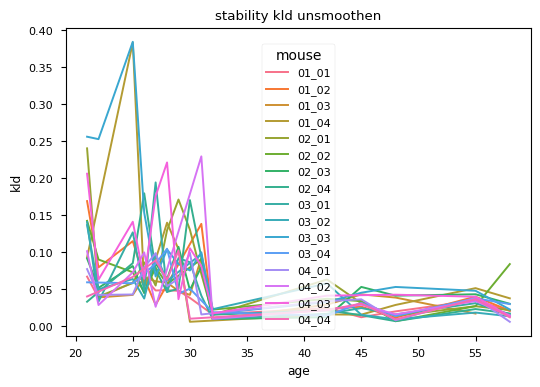

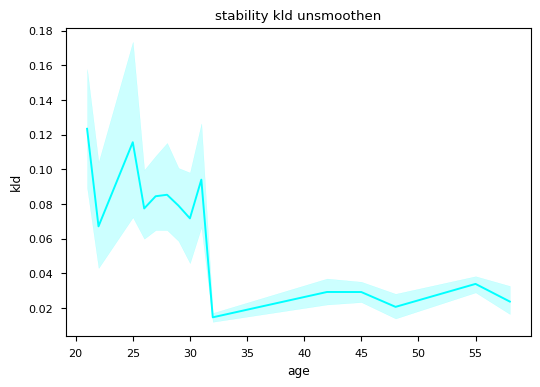

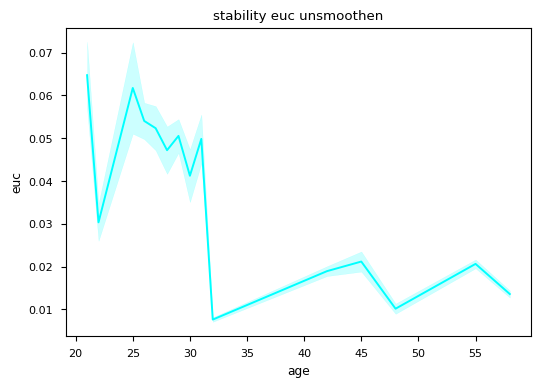

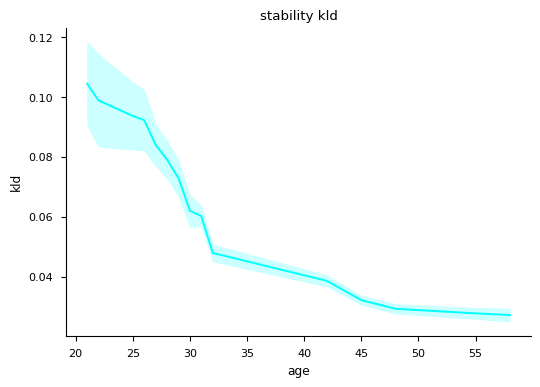

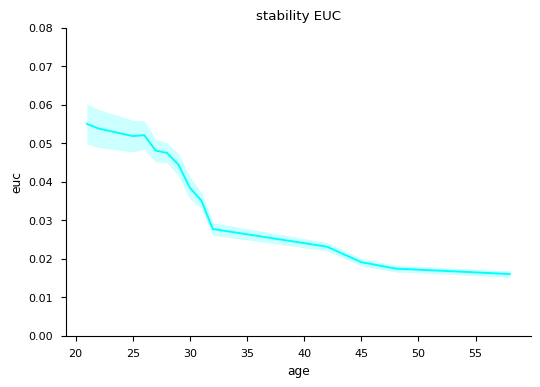

In [131]:
#prepate data for plot
flat_kld = [item for sublist in kld for item in sublist]
flat_euc = [item for sublist in euc for item in sublist]

df = pd.DataFrame()
df['kld']=flat_kld
df['age'] = ages
df['euc'] = flat_euc
df['mouse'] = mouse

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='kld', 
             hue='mouse',
             #estimator='mean', 
             #errorbar='se',
             #c='cyan'
            )
ax.set_title('stability kld unsmoothen')

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='kld', 
             #estimator='mean', 
             #errorbar='se',
             c='cyan'
            )
ax.set_title('stability kld unsmoothen')


fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='euc', estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability euc unsmoothen')


# smooth the data
# prepare data
data=df.copy()
ind = data['age'].unique()
concat = pd.DataFrame()
for m, _df in data.groupby('mouse'):
    #_df=_df.drop_duplicates(subset=['ages'])
    temp= gaussian_filter1d(_df['kld'], sigma=2)
    _df['kld'] = temp
    concat=pd.concat([concat,_df])

klds_mv1 = concat.copy()    

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=concat, x="age", y="kld", estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability kld')
#ax.set_ylim(0,0.08)
sns.despine()
#plt.savefig(data_loc +'long_stability.pdf', bbox_inches='tight')

# prepare data euclidian
data=df.copy()
ind = data['age'].unique()
concat = pd.DataFrame()
for m, _df in data.groupby('mouse'):
    #_df=_df.drop_duplicates(subset=['ages'])
    temp= gaussian_filter1d(_df['euc'], sigma=2)
    _df['euc'] = temp
    concat=pd.concat([concat,_df])
eucs_mv1 = concat.copy()

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=concat, x="age", y="euc", estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability EUC')
ax.set_ylim(0,0.08)
sns.despine()

mv1=df.copy()

<Axes: xlabel='age', ylabel='kld'>

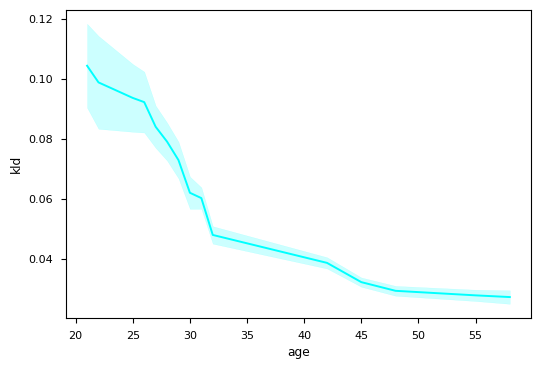

In [132]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=klds_mv1, x="age", y="kld", estimator='mean', errorbar='se',c='cyan')

In [123]:
## upload data new male longtogeny
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/longv2_females_clean.parquet')
mdf = pd.read_parquet(path)
mdf=mdf.loc[[24,31,38,45,52,60]]
bad_syllable=[21,24,25,28,32,36,37,41,44,47,49,51]
#bad_syllable=[]
mdf.drop(bad_syllable, axis=1, inplace=True)
newdf=mdf.copy()

# for males point by point kld and euc distance
n=0
ages=[]
kld=[]
euc=[]
mouse=[]
dif=[]
for age,_df in enumerate(newdf.groupby('mouse')):
    ages.extend(_df[1].index.get_level_values(0).to_numpy()[:-1])
    tmp = pd.Series(_df[1].index.get_level_values(0)).diff().to_numpy()
    dif.extend(tmp)
    mouse.extend(_df[1].index.get_level_values(1).to_numpy()[:-1])
    data_temp = _df[1].to_numpy()
    kld_temp = KLD_analysis(data_temp)
    utemp = pairwise_distances(data_temp)
    kld.append(np.diagonal(kld_temp,offset=1).copy()/ tmp[1:])
    euc.append(np.diagonal(utemp,offset=1).copy() / tmp[1:])

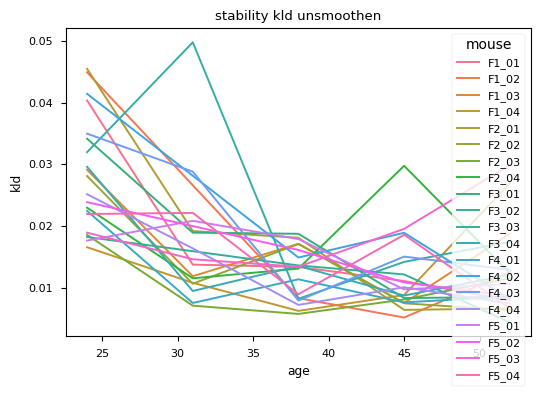

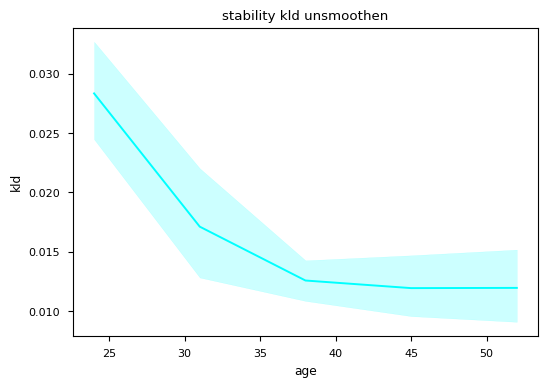

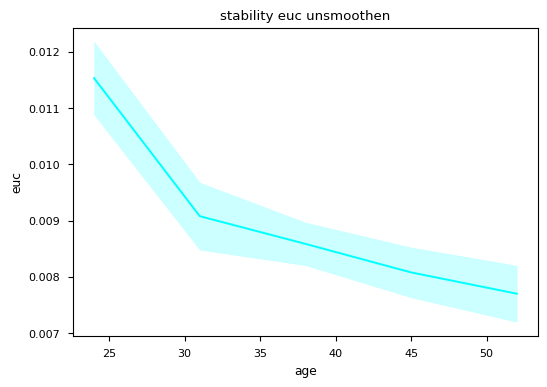

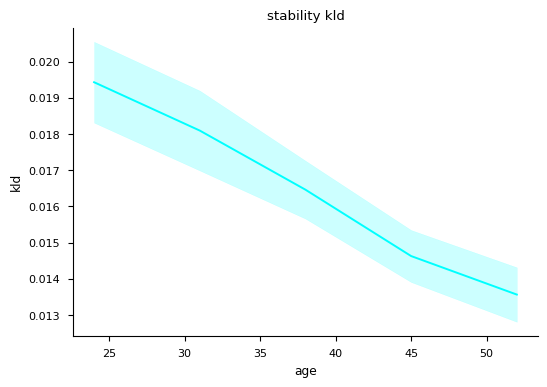

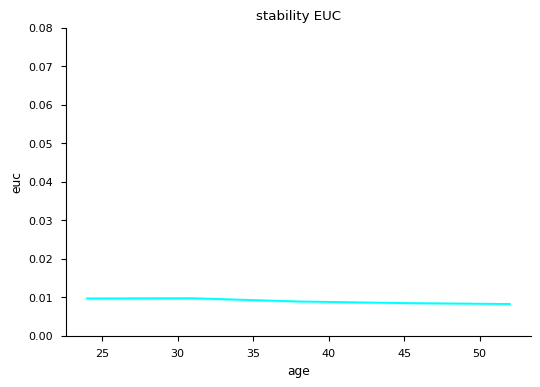

In [124]:
#prepate data for plot
flat_kld = [item for sublist in kld for item in sublist]
flat_euc = [item for sublist in euc for item in sublist]

df = pd.DataFrame()
df['kld']=flat_kld
df['age'] = ages
df['euc'] = flat_euc
df['mouse'] = mouse

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='kld', 
             hue='mouse',
             #estimator='mean', 
             #errorbar='se',
             #c='cyan'
            )
ax.set_title('stability kld unsmoothen')

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='kld', 
             #estimator='mean', 
             #errorbar='se',
             c='cyan'
            )
ax.set_title('stability kld unsmoothen')


fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x='age', y='euc', estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability euc unsmoothen')


# smooth the data
# prepare data
data=df.copy()
ind = data['age'].unique()
concat = pd.DataFrame()
for m, _df in data.groupby('mouse'):
    #_df=_df.drop_duplicates(subset=['ages'])
    temp= gaussian_filter1d(_df['kld'], sigma=2)
    _df['kld'] = temp
    concat=pd.concat([concat,_df])

klds_fv2 = concat.copy()    

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=concat, x="age", y="kld", estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability kld')
#ax.set_ylim(0,0.08)
sns.despine()
#plt.savefig(data_loc +'long_stability.pdf', bbox_inches='tight')

# prepare data euclidian
data=df.copy()
ind = data['age'].unique()
concat = pd.DataFrame()
for m, _df in data.groupby('mouse'):
    #_df=_df.drop_duplicates(subset=['ages'])
    temp= gaussian_filter1d(_df['euc'], sigma=2)
    _df['euc'] = temp
    concat=pd.concat([concat,_df])
eucs_fv2 = concat.copy()

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=concat, x="age", y="euc", estimator='mean', errorbar='se',c='cyan')
ax.set_title('stability EUC')
ax.set_ylim(0,0.08)
sns.despine()
#plt.savefig(data_loc +'long_stability.pdf', bbox_inches='tight')

fv2=df.copy()

In [125]:
## plot all togeher

In [126]:
euc_smooth = pd.concat([eucs_fv2,eucs_mv2,eucs_mv1])
kld_smooth = pd.concat([klds_fv2,klds_mv2,klds_mv1])
exp = np.concatenate((len(eucs_fv2) * ['Fv2'],
                         len(eucs_mv2) * ['Mv2'],
                         len(eucs_mv1) * ['Mv1']
                        ))
euc_smooth['exp']=exp
kld_smooth['exp']=exp

Text(0.5, 1.0, 'stability kld')

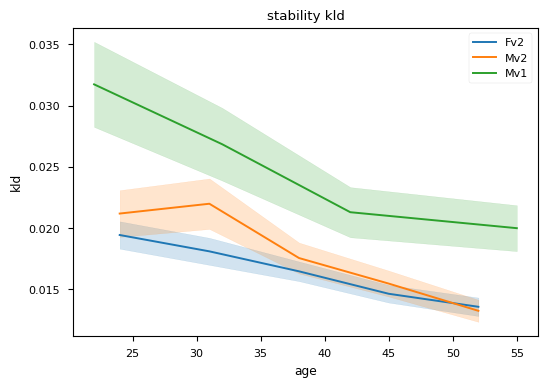

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=kld_smooth, x="age", y="kld", estimator='mean', errorbar='se',hue=exp)
ax.set_title('stability kld')

Text(0.5, 1.0, 'stability euc')

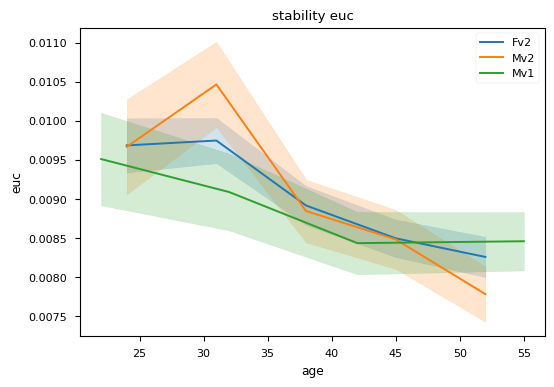

In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=euc_smooth, x="age", y="euc", estimator='mean', errorbar='se',hue=exp)
ax.set_title('stability euc')

In [18]:
# for males 5 point window

In [19]:
df=newdf.groupby(['mouse','age']).mean()

In [20]:
xmale = pd.DataFrame()
kld=[]
euc=[]
age=[]
mouse=[]
n=5
for m,_df in enumerate(df.groupby('mouse')):
    kld1=[]
    euc1=[]
    age1=[]
    a=0
    b=False
    while True:
        data_temp = _df[1][a:a+n]
        if data_temp.empty:
            break
        #age1.append(np.floor(np.mean(data_temp.index.get_level_values(1))).astype(int))
        age1.append(data_temp.index.get_level_values(1)[0].astype(int))
        temp = data_temp.to_numpy()
        kld_temp = KLD_analysis(temp)
        utemp = pairwise_distances(temp)
        kld1.append(np.nanmean(kld_temp))
        euc1.append(np.nanmean(utemp))
        mouse.append(_df[0])
        len(age1)
        len(kld1)
        len(euc1)
        len(tmp)
        a=a+1
    #tmp = pd.Series(_df[1].index.get_level_values(1)).diff().to_numpy()
    tmp = pd.Series(age1).diff().to_numpy()
    kld.append(kld1/ tmp)
    #age.append(age1)
    age.append(age1)
    euc.append(euc1/ tmp)

<Axes: >

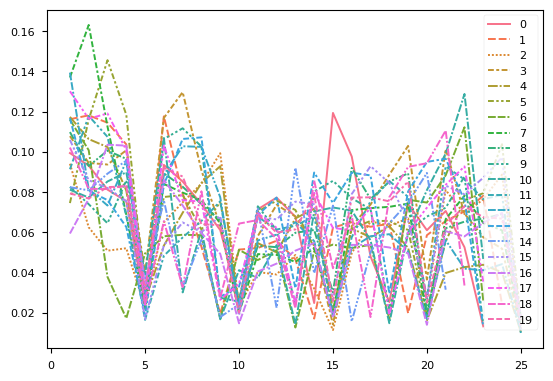

In [21]:
sns.lineplot(kld, estimator='mean', errorbar='se')

In [22]:
flat_kld = [item for sublist in kld for item in sublist]
flat_euc = [item for sublist in euc for item in sublist]
flat_age = [item for sublist in age for item in sublist]

In [23]:
df = pd.DataFrame()
df['kld']=flat_kld
df['age'] = flat_age
df['euc'] = flat_euc
df['mouse'] = mouse

<Axes: xlabel='age', ylabel='kld'>

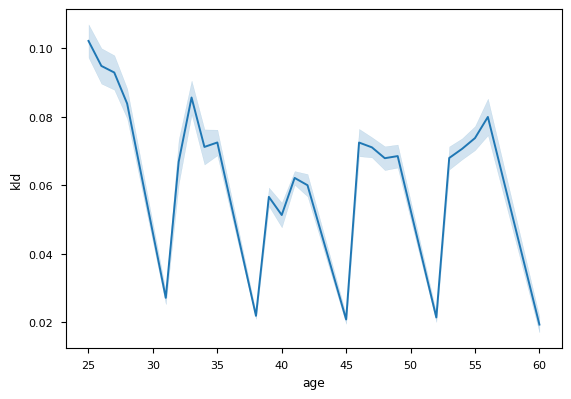

In [24]:
sns.lineplot(data=df, x='age', y='kld', estimator='mean', errorbar='se')

In [25]:
## smooth kld

In [26]:
from scipy.ndimage.filters import gaussian_filter1d

In [27]:
# prepare data
data=df.copy()
ind = data['age'].unique()
concat = pd.DataFrame()
for m, _df in data.groupby('mouse'):
    #_df=_df.drop_duplicates(subset=['ages'])
    temp= gaussian_filter1d(_df['kld'], sigma=5)
    _df['kld'] = temp
    concat=pd.concat([concat,_df])

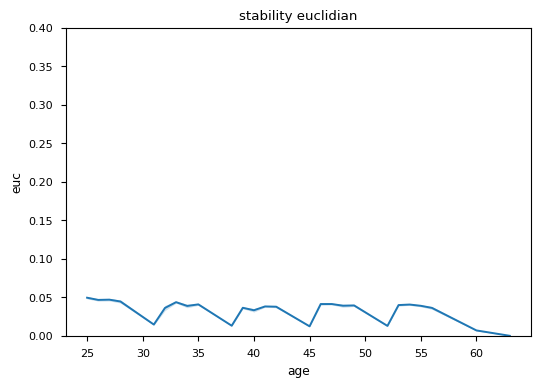

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=concat, x="age", y="euc", estimator='mean', errorbar='se')
ax.set_title('stability euclidian')
ax.set_ylim(0,0.4)
em = df.copy()

In [29]:
## plot kld mtrixes per mouse
## upload data new male longtogeny
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/longv2_females_clean.parquet')
mdf = pd.read_parquet(path)
bad_syllable=[21,24,25,28,32,36,37,41,44,47,49,51]
#bad_syllable=[]
mdf.drop(bad_syllable, axis=1, inplace=True)
newdf=mdf.copy()

In [42]:
def plot_KLD(cohort_dist,age_labels,name='trial',vmax=1):
    # cohort_dist is matrix of
    seqmatcolor='Purples_r'
    cmg=sns.clustermap(cohort_dist,cmap=seqmatcolor,xticklabels=1,yticklabels=1,
                   colors_ratio=0.2,cbar_pos=(0.99, 0.045, 0.03, .70),
                   col_cluster=False,row_cluster=False,
                   method='average',metric='sqeuclidean', vmax=vmax)
    cmg.fig.set_size_inches(3,3)
    ax = cmg.ax_heatmap
    ax.set_xticklabels(age_labels)
    ax.set_yticklabels(age_labels)
    ax.set_title('KLD distance between days for mouse:' + name,fontsize=12)
    plt.show()

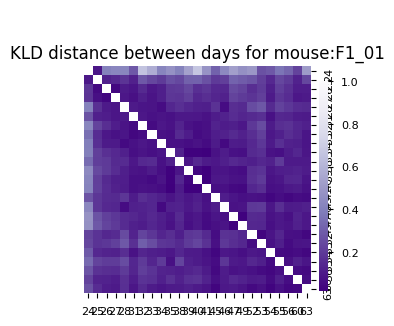

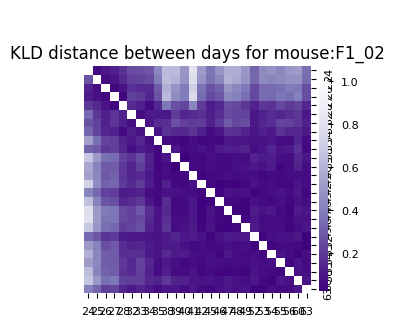

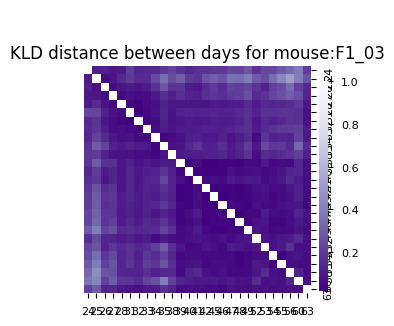

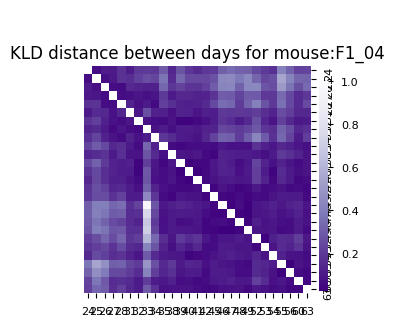

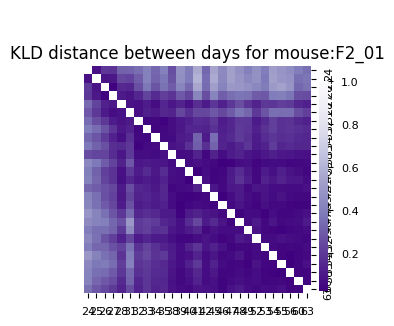

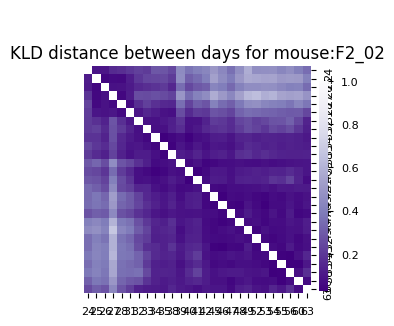

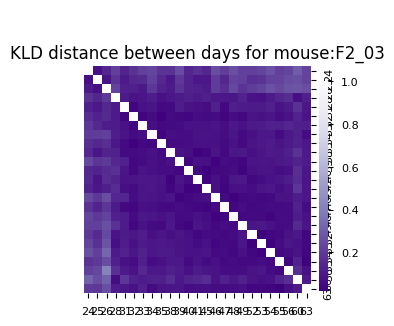

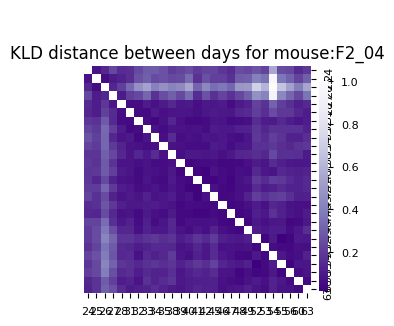

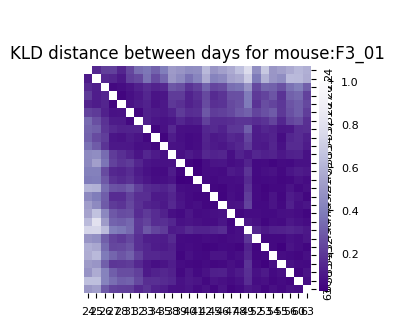

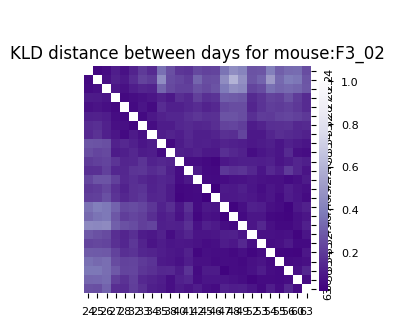

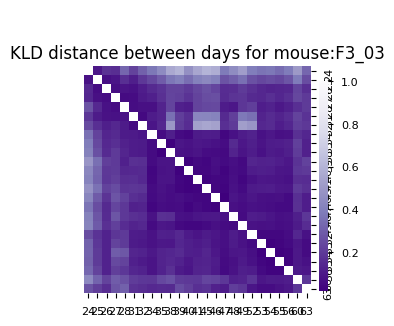

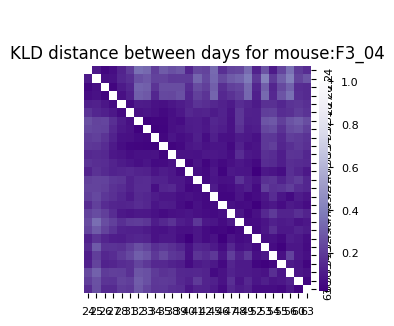

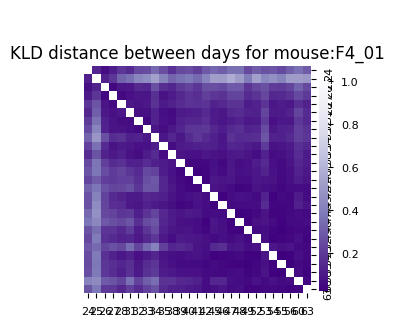

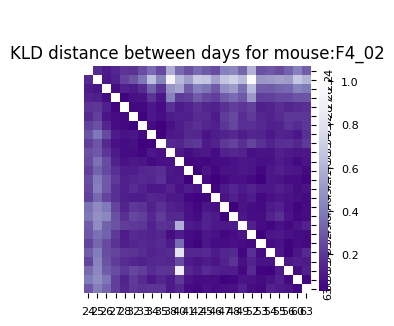

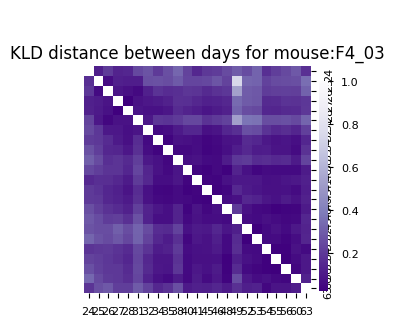

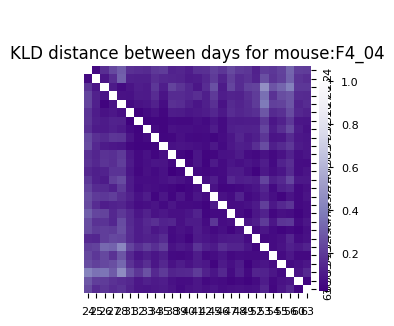

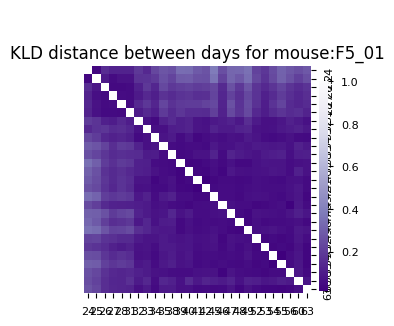

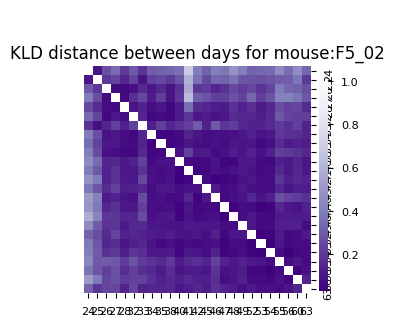

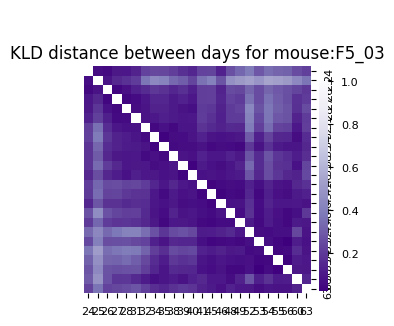

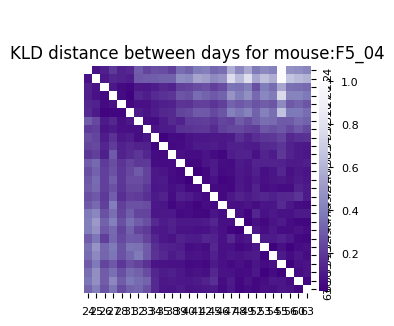

In [48]:
for mouse,_df in enumerate(newdf.groupby('mouse')):
    data_temp = _df[1].to_numpy()
    kld_temp = KLD_analysis(data_temp)
    ages=(_df[1].index.get_level_values(0).to_numpy())
    plot_KLD(kld_temp,ages,_df[0])

In [ ]:
## another attempy of calculating stability

In [96]:
## upload data new male longtogeny
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/longv2_males_clean.parquet')
mdf = pd.read_parquet(path)
mdf=mdf.loc[[24,25,31,32,38,39,45,46,52,53]]
## filter out bad days - 
bad_syllable=[21,24,25,28,32,36,37,41,44,47,49,51]
#bad_syllable=[]
mdf.drop(bad_syllable, axis=1, inplace=True)
#fdf.drop(bad_syllable, axis=1, inplace=True)

newdf=mdf.copy()

# for males point by point kld and euc distance
n=0
ages=[]
kld=[]
euc=[]
mouse=[]
dif=[]
for age,_df in enumerate(newdf.groupby('mouse')):
    ages.extend(_df[1].index.get_level_values(0).to_numpy()[:-1])
    tmp = pd.Series(_df[1].index.get_level_values(0)).diff().to_numpy()
    dif.extend(tmp[1:])
    mouse.extend(_df[1].index.get_level_values(1).to_numpy()[:-1])
    data_temp = _df[1].to_numpy()
    kld_temp = KLD_analysis(data_temp)
    utemp = pairwise_distances(data_temp)
    kld.append(np.diagonal(kld_temp,offset=1).copy())#/ tmp[1:])
    euc.append(np.diagonal(utemp,offset=1).copy())#/ tmp[1:])

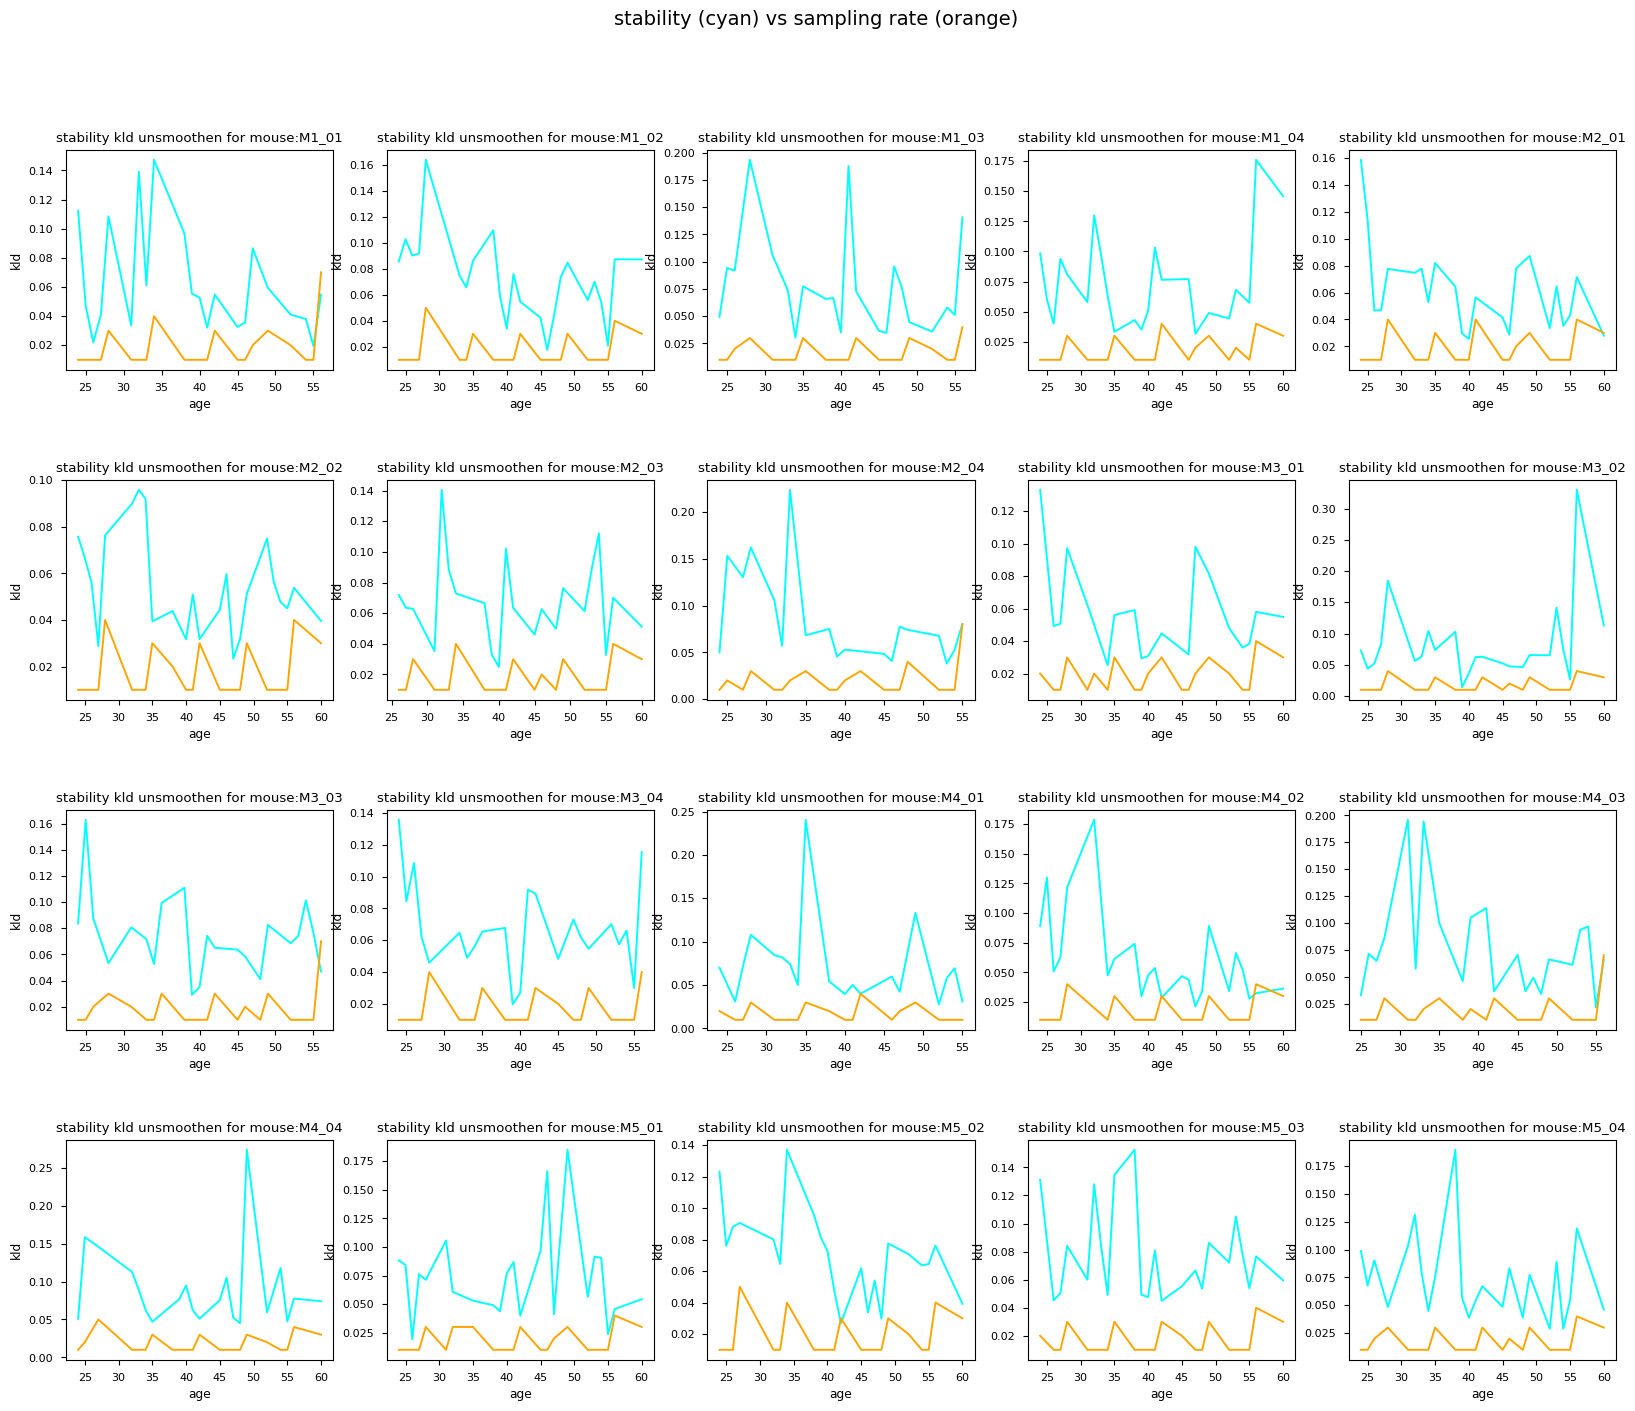

In [97]:
#prepate data for plot
flat_kld = [item for sublist in kld for item in sublist]
flat_euc = [item for sublist in euc for item in sublist]

df = pd.DataFrame()
df['kld']=flat_kld
df['age'] = ages
df['euc'] = flat_euc
df['mouse'] = mouse
df['dif'] = np.array(dif)/100

plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("stability (cyan) vs sampling rate (orange)", fontsize=14, y=0.95)
n=0

for age,_df in enumerate(df.groupby('mouse')):
    m=_df[0]
    #fig, ax = plt.subplots()
    #fig.set_size_inches(6,4)
    ax = plt.subplot(5, 5, n + 1)
    sns.lineplot(data=_df[1], x='age', y='kld',
                 ax=ax,
             #estimator='mean', 
             #errorbar='se',
             c='cyan'
            )
    sns.lineplot(data=_df[1], x='age', y='dif', 
             #estimator='mean', 
             #errorbar='se',
                 ax=ax,
             c='orange'
            )
    ax.set_title('stability kld unsmoothen for mouse:' + m)
    n=n+1